In [3]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import sys, re, json, os, datetime
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
%%time 
total_playlists = 0
total_tracks = 0
tracks = set()
artists = set()
albums = set()
titles = set()
total_descriptions = 0
ntitles = set()
title_histogram = Counter()
artist_histogram = Counter()
track_histogram = Counter()
last_modified_histogram = Counter()
num_edits_histogram = Counter()
playlist_length_histogram = Counter()
num_followers_histogram = Counter()

def process_mpd(path):
    count = 0
    filenames = os.listdir(path)
    for filename in sorted(filenames):
        if filename.startswith("mpd.slice.") and filename.endswith(".json"):
            fullpath = os.sep.join((path, filename))
            f = open(fullpath)
            js = f.read()
            f.close()
            mpd_slice = json.loads(js)
            process_info(mpd_slice['info'])
            for playlist in mpd_slice['playlists']:
                process_playlist(playlist)
            count += 1

def normalize_name(name):
    name = name.lower()
    name = re.sub(r"[.,\/#!$%\^\*;:{}=\_`~()@-]", ' ', name)
    name = re.sub(r"&", 'and', name)
    name = re.sub(r'\s+', ' ', name).strip()
    return name

def to_date(epoch):
    return datetime.datetime.fromtimestamp(epoch).strftime("%Y-%m-%d")

def process_playlist(playlist):
    global total_playlists, total_tracks, total_descriptions

    total_playlists += 1
    # print playlist['playlist_id'], playlist['name']

    if 'description' in playlist:
        total_descriptions += 1

    titles.add(playlist['name'])
    nname = normalize_name(playlist['name'])
    ntitles.add(nname)
    title_histogram[nname] += 1

    playlist_length_histogram[playlist['num_tracks']] += 1
    last_modified_histogram[playlist['modified_at']] += 1
    num_edits_histogram[playlist['num_edits']] += 1
    num_followers_histogram[playlist['num_followers']] += 1

    for track in playlist['tracks']:
        total_tracks += 1
        albums.add(track['album_uri'])
        tracks.add(track['track_uri'])
        artists.add(track['artist_uri'])

        full_name = track['track_name'] + " by " + track['artist_name']
        artist_histogram[track['artist_name']] += 1
        track_histogram[full_name] += 1


def process_info(_):
    pass

path = '../spotify_million_playlist_dataset/data/'
process_mpd(path)

CPU times: user 6min 14s, sys: 16.6 s, total: 6min 30s
Wall time: 6min 31s


In [5]:
print ("number of playlists", total_playlists)
print ("number of tracks", total_tracks)
print ("number of unique tracks", len(tracks))
print ("number of unique albums", len(albums))
print ("number of unique artists", len(artists))
print ("number of unique titles", len(titles))
print ("number of playlists with descriptions", total_descriptions)
print ("number of unique normalized titles", len(ntitles))
print ("avg playlist length", float(total_tracks) / total_playlists)

number of playlists 1000000
number of tracks 66346428
number of unique tracks 2262292
number of unique albums 734684
number of unique artists 295860
number of unique titles 92944
number of playlists with descriptions 18760
number of unique normalized titles 17266
avg playlist length 66.346428


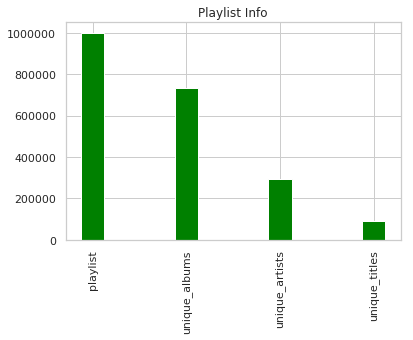

In [49]:
playlist_info = {}
playlist_info['playlist'] = total_playlists
playlist_info['unique_albums'] = len(albums)
playlist_info['unique_artists'] = len(artists)
playlist_info['unique_titles'] = len(titles)

plt.bar(range(len(playlist_info)), list(playlist_info.values()), align='center', color = 'green', width = 0.25)
plt.xticks(range(len(playlist_info)), list(playlist_info.keys()), rotation= 'vertical')
plt.title("Playlist Info")
plt.show()
fig.savefig("Playlist_Info.png")

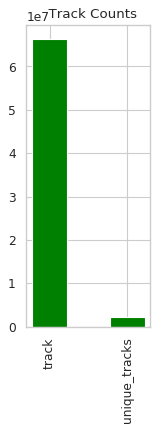

In [51]:
track_distribution = {}
track_distribution['track'] = total_tracks
track_distribution['unique_tracks'] = len(tracks)

figure(figsize=(2, 5), dpi=80)

margin = 0.05
width = (1.-2.*margin)/2
plt.bar(range(len(track_distribution)), list(track_distribution.values()), align='center', color = 'green', width = width)
plt.xticks(range(len(track_distribution)), list(track_distribution.keys()), rotation= 'vertical')

plt.title("  Track Counts")
plt.show()
fig.savefig("Track_Count.png")

top artists
 847160 Drake
 413297 Kanye West
 353624 Kendrick Lamar
 339570 Rihanna
 316603 The Weeknd
 294667 Eminem
 272116 Ed Sheeran
 250734 Future
 243119 Justin Bieber
 241560 J. Cole


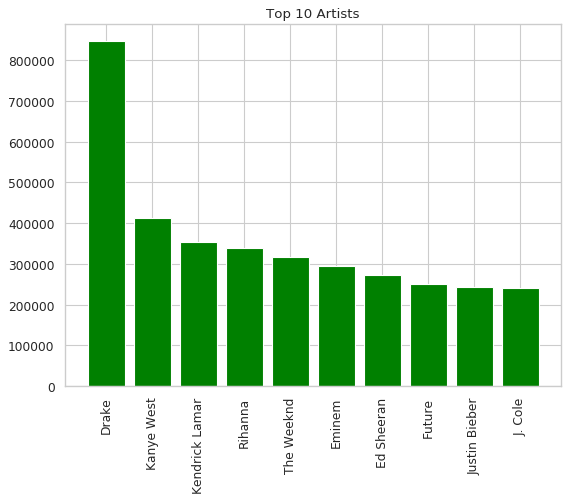

In [53]:

print ("top artists")

top_artist = {}

for artist, count in artist_histogram.most_common(10):
    top_artist[artist] = count
    print ("%7d %s" % (count, artist))
    
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.bar(range(len(top_artist)), list(top_artist.values()), align='center', color = 'green')
plt.xticks(range(len(top_artist)), list(top_artist.keys()), rotation= 'vertical')

plt.title("Top 10 Artists")
plt.show()
fig.savefig("TopArtists.png")

  10000 country
  10000 chill
   8493 rap
   8481 workout
   8146 oldies
   8015 christmas
   6848 rock
   6157 party
   5883 throwback
   5063 jams


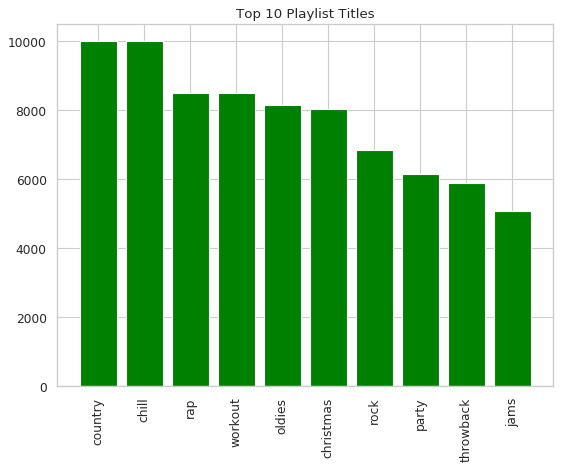

In [54]:
  
playlist_titles = {}

for title, count in title_histogram.most_common(10):
    playlist_titles[title] = count
    print ("%7d %s" % (count, title))
    

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.bar(range(len(playlist_titles)), list(playlist_titles.values()), align='center', color = 'green')
plt.xticks(range(len(playlist_titles)), list(playlist_titles.keys()), rotation= 'vertical')

plt.title("Top 10 Playlist Titles")
plt.show()
fig.savefig("TopTiltles.png")

top tracks
  46574 HUMBLE. by Kendrick Lamar
  43447 One Dance by Drake
  41309 Broccoli (feat. Lil Yachty) by DRAM
  41079 Closer by The Chainsmokers
  39987 Congratulations by Post Malone
  35202 Caroline by Aminé
  35138 iSpy (feat. Lil Yachty) by KYLE
  34999 Bad and Boujee (feat. Lil Uzi Vert) by Migos
  34990 Location by Khalid
  34922 XO TOUR Llif3 by Lil Uzi Vert




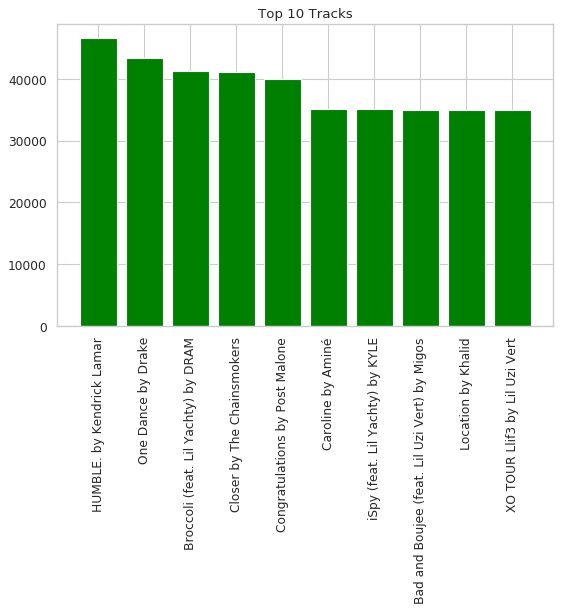

In [59]:
top_tracks = {}
print ("top tracks")
for track, count in track_histogram.most_common(10):
    top_tracks[track] = count
    print ("%7d %s" % (count, track))

print ('\n')

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 5), dpi=80)

plt.bar(range(len(top_tracks)), list(top_tracks.values()), align='center', color = 'green')
plt.xticks(range(len(top_tracks)), list(top_tracks.keys()), rotation= 'vertical')

plt.title("Top 10 Tracks")
plt.show()
fig.savefig("TopTracks.png")

# Data Analysis including the Audio Features

In [5]:
#Read the csv with the merged data which has the audio features
df_meta = pd.read_csv('merged_200_final_1.csv')

In [6]:
df_meta.head(5)

,pid,track_uri,artist_name,artist_uri,track_name,album_name,duration_ms_x,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature
0,0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,0.904,0.813,4,...,0.0471,0.81,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
1,123,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,0.904,0.813,4,...,0.0471,0.81,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
2,218,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,0.904,0.813,4,...,0.0471,0.81,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
3,342,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,0.904,0.813,4,...,0.0471,0.81,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
4,382,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,226863,0.904,0.813,4,...,0.0471,0.81,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4


In [13]:
#Get the 5000 songs for more Data Analysis
df = df_meta[:5000]

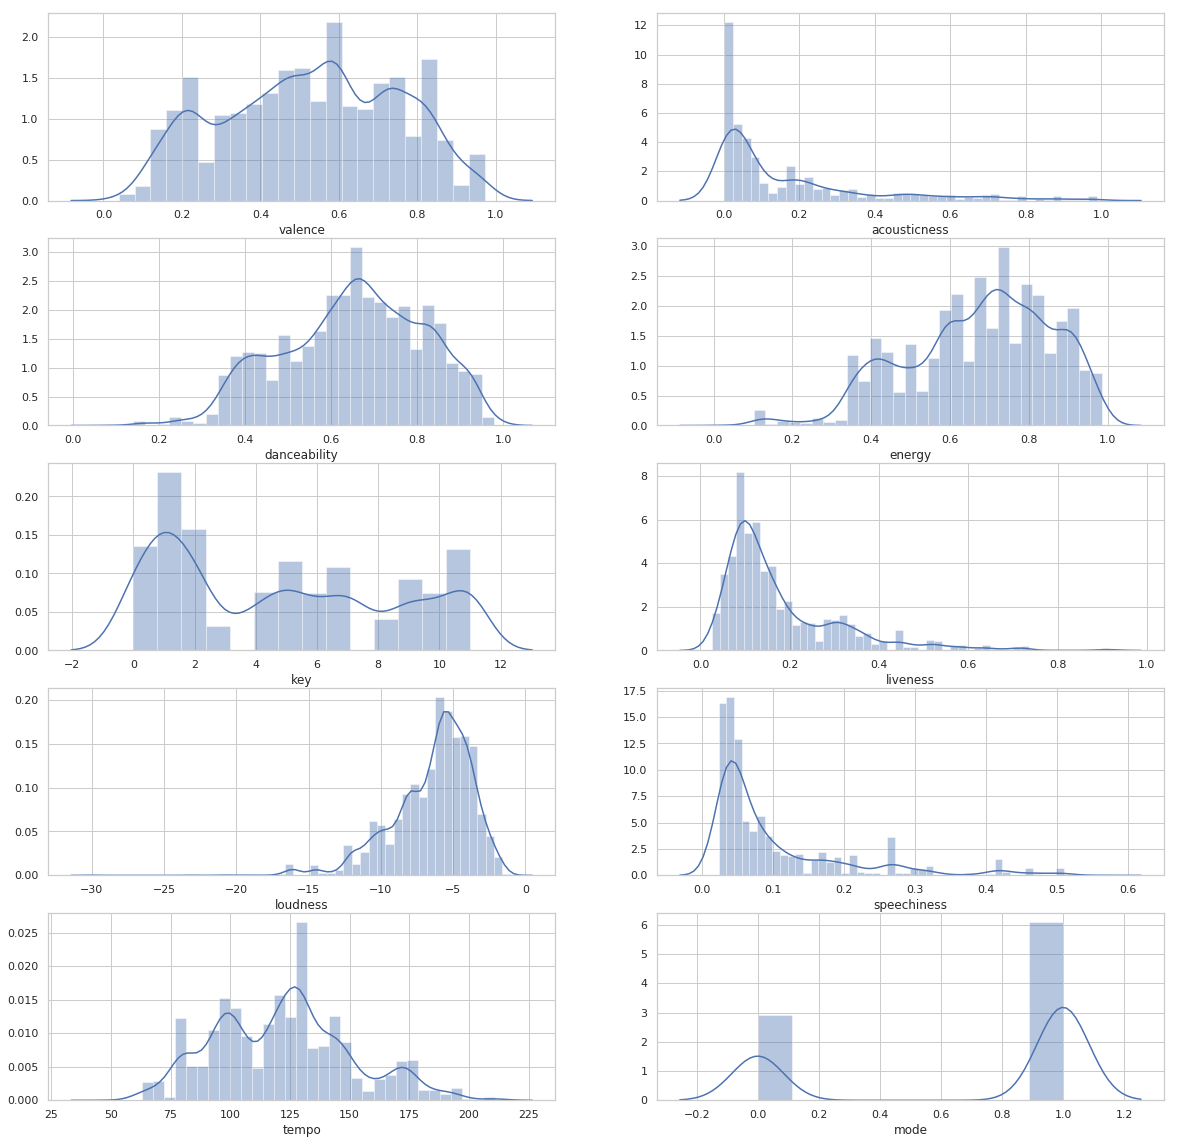

In [69]:
#Visualisation of Audio features extracted from Spotify API
fig,ax = plt.subplots(5,2,figsize=(20,20))

sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['acousticness'],ax=ax[0,1])
sns.distplot(df['danceability'],ax=ax[1,0])
sns.distplot(df['energy'],ax=ax[1,1])
sns.distplot(df['key'],ax=ax[2,0])
sns.distplot(df['liveness'],ax=ax[2,1])
sns.distplot(df['loudness'],ax=ax[3,0])
sns.distplot(df['speechiness'],ax=ax[3,1])
sns.distplot(df['tempo'],ax=ax[4,0])
sns.distplot(df['mode'],ax=ax[4,1])

fig.savefig("AudioFeatures.png")

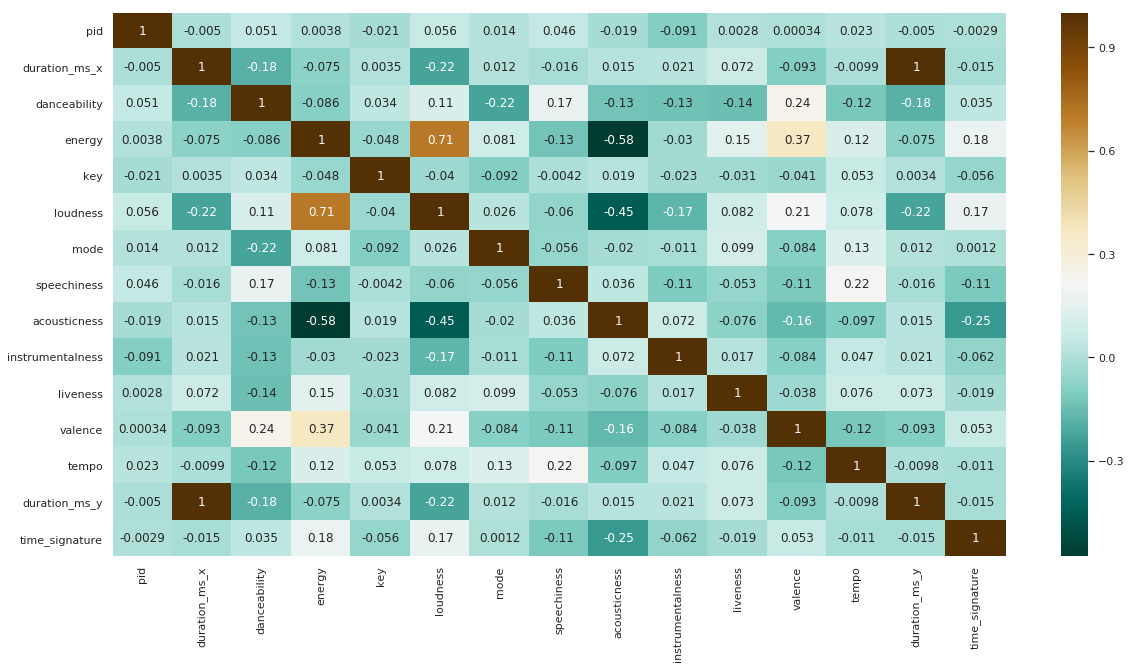

In [15]:
#Correlation of the data 

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})